# Assignment - Logistic Regression

In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

* Download Titanic data from Kaggle. The data in the train.csv file meets your need.
* Split your data into training and test sets.
* Predict the survival based on the test data you split by creating your model.
* Is your model's performance satisfactory? Explain.
* Try to improve your model's performance by adding or subtracting some variables.

Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
titanic = pd.read_csv("titanic_train.csv")
df = titanic.copy()

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df[df["Age"] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


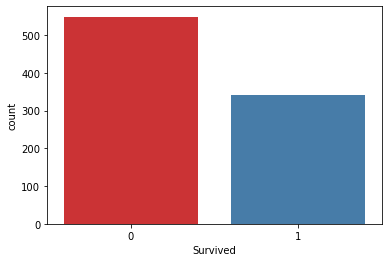

In [7]:
sns.countplot(x='Survived',data=df, palette='Set1');

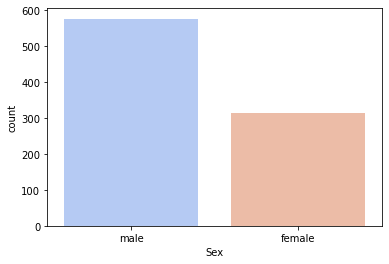

In [8]:
sns.countplot(x='Sex',data=df, palette="coolwarm");

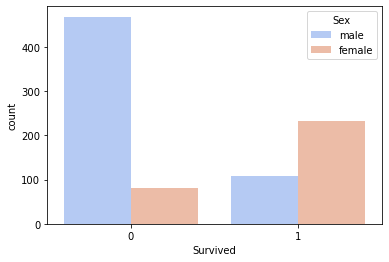

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df, palette="coolwarm");

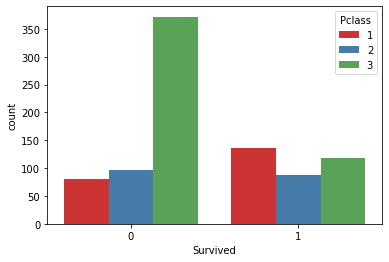

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df, palette="Set1");

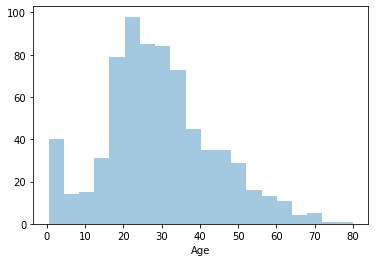

In [11]:
sns.distplot(df['Age'].dropna(), kde=False);

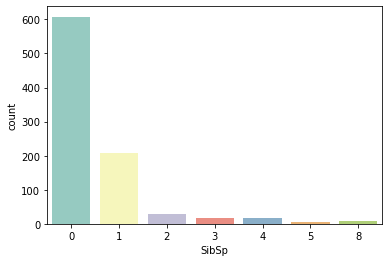

In [12]:
sns.countplot(x= 'SibSp', data=df, palette="Set3");

* Most of the people don't have any spouse or siblings

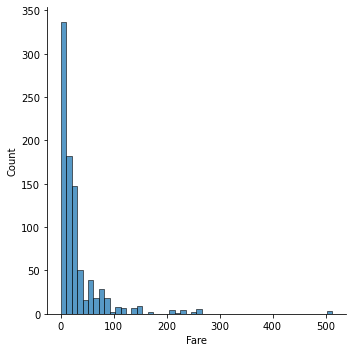

In [13]:
sns.displot(df['Fare'], bins=50);

### Missing Values

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, cabin and embarked features have missing values. Majority of the values in cabin feature are missing so we will drop the feature.

In [15]:
df2 = df.drop('Cabin', axis=1)

In [16]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

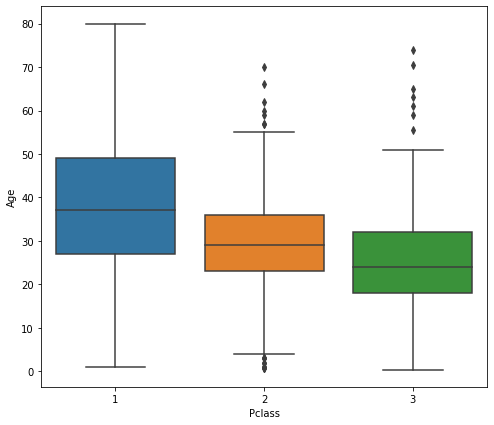

In [17]:
plt.figure(figsize=(8,7))
sns.boxplot(x = df2['Pclass'], y = df2['Age']);

In [18]:
c1_mean = df2[df['Pclass'] == 1]["Age"].mean()
c2_mean = df2[df['Pclass'] == 2]["Age"].mean()
c3_mean = df2[df['Pclass'] == 3]["Age"].mean()

print("Mean of class1: {:.2f}".format(c1_mean))
print("Mean of class2: {:.2f}".format(c2_mean))
print("Mean of class3: {:.2f}".format(c3_mean))

Mean of class1: 38.23
Mean of class2: 29.88
Mean of class3: 25.14


In [19]:
print("Mean of Age:", df2["Age"].mean())

Mean of Age: 29.69911764705882


In [20]:
def fill_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return c1_mean
        if Pclass == 2:
            return c2_mean
        if Pclass == 3:
            return c3_mean
    else:
        return Age

In [21]:
df2['Age'] = df2[['Age','Pclass']].apply(fill_age,axis=1)

In [22]:
df2.dropna(inplace=True)

In [23]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df2["Age"] = df2["Age"].astype(int)
print(df2["Age"].dtype)

int32


In [25]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


### Converting Categorial Values

In [26]:
df2.dtypes[df2.dtypes == "object"]

Name        object
Sex         object
Ticket      object
Embarked    object
dtype: object

In [27]:
df2 = pd.get_dummies(df2, columns = ["Sex","Embarked"], drop_first=True)
df3 = df2.drop(['PassengerId','Name','Ticket'],axis=1)

In [28]:
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [29]:
df3.to_csv('titanic2.csv',index = False)

### Logistic Regression

In [39]:
y = df3['Survived']
X = df3.drop('Survived', axis=1)

In [40]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       104
           1       0.84      0.72      0.77        74

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.82       178



In [32]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.81
Accuracy on Test Data  : 0.82


* We have 81% accuracy on train data and 82% accuracy on test data. Accuracy is good but there's still room for improvement.

In [33]:
df4 = df3.copy()

In [34]:
df3["Age_Sex_male"] = df3["Age"] * df3["Sex_male"] 

y = df3['Survived']
X = df3.drop(['Survived'], axis=1)

In [35]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.82
Accuracy on Test Data  : 0.83


In [37]:
y = df3['Survived']
X = df3.drop(['Survived','Fare'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.83
Accuracy on Test Data  : 0.84


After adding and subtracting some variables the accuracy on the train data has increased from 81% to 83% and the accuracy on the test data has increased from 82% to 84%.